In [757]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [758]:
os.getcwd()

'C:\\Users\\SAI KRUPA\\Desktop\\Car_rent'

In [759]:
car_data= pd.read_csv("train_cab.csv")

In [760]:
car_data.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3


In [761]:
car_data.shape

(16067, 7)

In [762]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
fare_amount          16043 non-null object
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [763]:
#car_data['fare_amount'] = car_data['fare_amount'].astype(float)

In [764]:
car_data[car_data.fare_amount =='430-']

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
1123,2009-09-22 19:01:01 UTC,-73.97961,40.771326,-73.975764,40.781965,1.0,430-


In [765]:
car_data.fare_amount[1123] = np.nan

C:\Users\SAI KRUPA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [766]:
car_data['fare_amount'] = car_data['fare_amount'].astype(float)

# Missing value analysis

In [767]:
car_data.isnull().sum()

pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
fare_amount          25
dtype: int64

In [768]:
null_value = pd.DataFrame(((car_data.isnull().sum())/len(car_data))*100)

In [769]:
null_value.index.name = "Variables"
null_value.columns = ["Percentage of missing value"]
null_value.reset_index(inplace =True)

In [770]:
null_value

,Variables,Percentage of missing value
0,pickup_datetime,0.000000
1,pickup_longitude,0.000000
2,pickup_latitude,0.000000
3,dropoff_longitude,0.000000
4,dropoff_latitude,0.000000
5,passenger_count,0.342317
6,fare_amount,0.155598


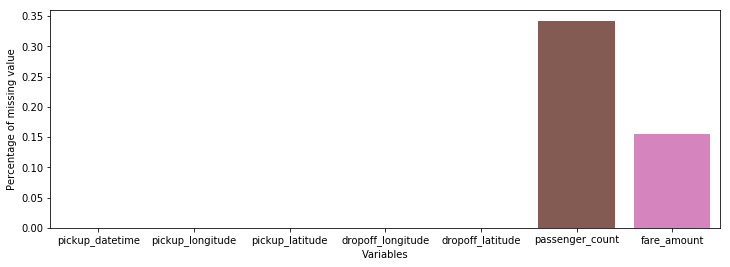

In [771]:
#Ploting the null value % in dataset by variable.
plt.subplots(figsize = (12,4))
sns.barplot(null_value['Variables'],null_value['Percentage of missing value'])


In [772]:
#sns.heatmap(car_data.isnull(),yticklabels = False, cbar = False)

In [773]:
#car_data['passenger_count'].value_counts()

In [774]:
#Drop the observations which contain null value.
car_data= car_data.dropna()

In [775]:
car_data.shape

(15987, 7)

In [776]:
car_data.describe()

Variables,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
count,15987.000000,15987.000000,15987.000000,15987.000000,15987.000000,15987.000000
mean,-72.464447,39.915627,-72.464005,39.898725,2.623170,15.030232
std,10.573270,6.828818,10.569932,6.186185,60.890237,431.200458
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000,-3.000000
25%,-73.992143,40.734927,-73.991182,40.734651,1.000000,6.000000
50%,-73.981693,40.752603,-73.980168,40.753557,1.000000,8.500000
75%,-73.966819,40.767353,-73.963644,40.768005,2.000000,12.500000
max,40.766125,401.083332,40.802437,41.366138,5345.000000,54343.000000


In [777]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15987 entries, 0 to 16065
Data columns (total 7 columns):
pickup_datetime      15987 non-null object
pickup_longitude     15987 non-null float64
pickup_latitude      15987 non-null float64
dropoff_longitude    15987 non-null float64
dropoff_latitude     15987 non-null float64
passenger_count      15987 non-null float64
fare_amount          15987 non-null float64
dtypes: float64(6), object(1)
memory usage: 999.2+ KB


In [778]:
#car_data['fare_amount'] = car_data['fare_amount'].astype(float)
#car_data['passenger_count'] = car_data['passenger_count'] .astype(object)

In [779]:
#car_data['passenger_count'] = car_data['passenger_count'].fillna(car_data['passenger_count'].mode()[0])
#car_data['fare_amount'] = car_data['fare_amount'].fillna(car_data['fare_amount'].mean())

In [780]:
car_data.isnull().sum()

Variables
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
dtype: int64

In [781]:
car_data.shape

(15987, 7)

# Outlier analysis

In [782]:
car_data.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'fare_amount'],
      dtype='object', name='Variables')

In [783]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15987 entries, 0 to 16065
Data columns (total 7 columns):
pickup_datetime      15987 non-null object
pickup_longitude     15987 non-null float64
pickup_latitude      15987 non-null float64
dropoff_longitude    15987 non-null float64
dropoff_latitude     15987 non-null float64
passenger_count      15987 non-null float64
fare_amount          15987 non-null float64
dtypes: float64(6), object(1)
memory usage: 999.2+ KB


In [784]:
columns = ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude']
#col_data = car_data[columns].head()

In [785]:
sorted(car_data)

['dropoff_latitude',
 'dropoff_longitude',
 'fare_amount',
 'passenger_count',
 'pickup_datetime',
 'pickup_latitude',
 'pickup_longitude']

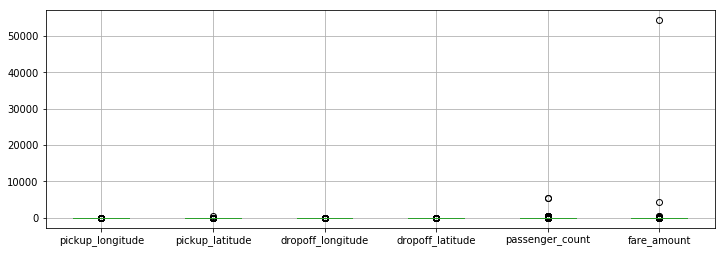

In [786]:
car_data.boxplot(figsize = (12,4))

In [787]:
car_data.head()

Variables,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3


In [788]:
# Count number of outliers in data

q75,q25 = np.percentile(car_data.fare_amount,[75,25])
    
iqr = q75 - q25
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

print("fare_amount:",iqr,min,max)

fare_amount: 6.5 -3.75 22.25


# Fare amount data analysis

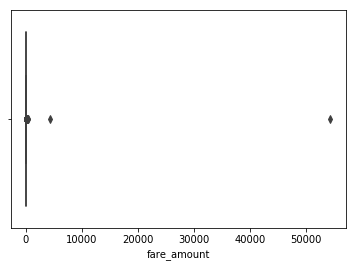

In [789]:
sns.boxplot(car_data.fare_amount)

In [790]:
car_data['fare_amount'].sort_values(ascending = False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
649         66.30
           ...   
7398         2.50
6632         2.50
8916         2.50
1774         2.50
3558         2.50
958          2.50
5449         2.50
657          2.50
4321         2.50
8795         2.50
4084         2.50
15257        2.50
376          2.50
8711         2.50
2306         2.50
11222        2.50
1419         2.50
3427         2.50
10458        2.50
13877        2.50
922          2.50
4367         2.50
6703         2.50
226          2.50
1427      

In [791]:
car_data = car_data.drop(car_data[car_data.loc[:,'fare_amount']>100].index)
car_data = car_data.drop(car_data[car_data.loc[:,'fare_amount']<1].index)

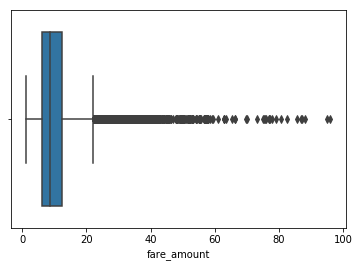

In [792]:
sns.boxplot(car_data['fare_amount'])

In [793]:
car_data['fare_amount'].sort_values(ascending = False).head()

12915    96.0
7810     95.0
9431     88.0
10077    87.3
12614    87.0
Name: fare_amount, dtype: float64

In [794]:
car_data

Variables,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3
5,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0,12.1
6,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0,7.5
7,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0,16.5
9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0,8.9
10,2012-04-08 07:30:50 UTC,-73.996335,40.737142,-73.980721,40.733559,1.0,5.3


# Passenger Count Data analysis

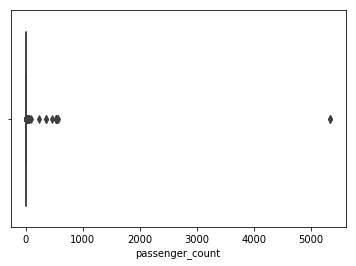

In [795]:
sns.boxplot(car_data['passenger_count'])

In [796]:
car_data.describe()

Variables,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
count,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000,15973.000000
mean,-72.467761,39.917469,-72.467319,39.900525,2.624342,11.271346
std,10.562262,6.824466,10.558918,6.180788,60.916900,9.378648
min,-74.438233,-74.006893,-74.227047,-74.006377,0.000000,1.140000
25%,-73.992133,40.734948,-73.991182,40.734700,1.000000,6.000000
50%,-73.981689,40.752632,-73.980168,40.753564,1.000000,8.500000
75%,-73.966832,40.767368,-73.963646,40.768005,2.000000,12.500000
max,40.766125,401.083332,40.802437,41.366138,5345.000000,96.000000


In [797]:
car_data['passenger_count'].sort_values(ascending=True)

10711       0.0
6575        0.0
5150        0.0
566         0.0
15286       0.0
15554       0.0
11462       0.0
3489        0.0
8971        0.0
4344        0.0
15919       0.0
3481        0.0
12611       0.0
5517        0.0
15514       0.0
5914        0.0
14196       0.0
13742       0.0
10642       0.0
3034        0.0
5557        0.0
8916        0.0
6881        0.0
678         0.0
5277        0.0
7640        0.0
13379       0.0
1935        0.0
3599        0.0
6036        0.0
          ...  
2078        6.0
7896        6.0
2060        6.0
1217        6.0
11146       6.0
14282       6.0
15291       6.0
7209        6.0
3549        6.0
6335        6.0
4867        6.0
1043       35.0
1242       43.0
8631       43.0
8406       53.0
1007       53.0
8445       58.0
8571       87.0
233       236.0
1107      345.0
386       354.0
263       456.0
8715      531.2
356       535.0
1200      536.0
8506      537.0
971       554.0
8985      557.0
293      5334.0
1146     5345.0
Name: passenger_count, L

In [798]:
car_data

Variables,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5
1,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9
2,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7
3,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7
4,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3
5,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0,12.1
6,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0,7.5
7,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0,16.5
9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0,8.9
10,2012-04-08 07:30:50 UTC,-73.996335,40.737142,-73.980721,40.733559,1.0,5.3


In [799]:
car_data = car_data.drop(car_data[car_data.loc[:,'passenger_count']>6].index)
car_data = car_data.drop(car_data[car_data.loc[:,'passenger_count']<1].index)
car_data = car_data.drop(car_data[car_data.loc[:,'passenger_count']==1.3].index)

In [800]:
car_data.describe()

Variables,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
count,15895.000000,15895.000000,15895.000000,15895.000000,15895.00000,15895.000000
mean,-72.478978,39.923655,-72.469232,39.901492,1.64989,11.282278
std,10.525042,6.811581,10.553019,6.179470,1.26606,9.392527
min,-74.438233,-74.006893,-74.227047,-74.006377,1.00000,1.140000
25%,-73.992141,40.734966,-73.991179,40.734751,1.00000,6.000000
50%,-73.981689,40.752640,-73.980158,40.753574,1.00000,8.500000
75%,-73.966819,40.767387,-73.963646,40.768021,2.00000,12.500000
max,40.766125,401.083332,40.802437,41.366138,6.00000,96.000000


In [801]:
car_data['passenger_count'].sort_values(ascending = False).head()

4479     6.0
6817     6.0
5675     6.0
4015     6.0
13109    6.0
Name: passenger_count, dtype: float64

In [802]:
car_data['passenger_count'].value_counts()

1.0    11230
2.0     2318
5.0     1044
3.0      675
4.0      327
6.0      301
Name: passenger_count, dtype: int64

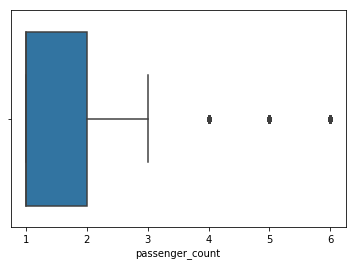

In [803]:
sns.boxplot(car_data['passenger_count'])

In [804]:
car_data.shape

(15895, 7)

# Pickup latitude and longitude data analysis

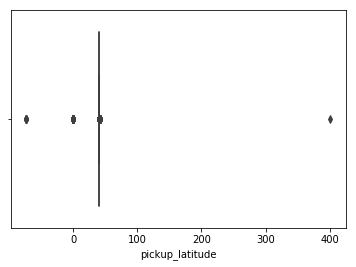

In [805]:
sns.boxplot(car_data['pickup_latitude'])

In [806]:
car_data['pickup_latitude'].sort_values(ascending = True)

8443     -74.006893
10091    -74.006210
9548     -73.992947
4783     -73.991840
3827     -73.988467
2147     -73.986968
6705     -73.983285
7525     -73.973047
10411      0.000000
13213      0.000000
9266       0.000000
13221      0.000000
3760       0.000000
13181      0.000000
3765       0.000000
1783       0.000000
3711       0.000000
9270       0.000000
13264      0.000000
13114      0.000000
9246       0.000000
13298      0.000000
13304      0.000000
6297       0.000000
6302       0.000000
1441       0.000000
13340      0.000000
13355      0.000000
13365      0.000000
13239      0.000000
            ...    
2918      40.839893
4458      40.840073
9960      40.840880
8707      40.841389
6371      40.841428
2107      40.841443
2346      40.841982
9927      40.850190
3587      40.850443
8955      40.852708
1147      40.857380
11463     40.858017
4313      40.865160
11366     40.866375
12934     40.876620
4004      40.876747
3394      40.956018
649       40.993260
11187     41.035688


In [807]:
car_data = car_data.drop(car_data[car_data.loc[:,'pickup_latitude']<39].index)
car_data = car_data.drop(car_data[car_data.loc[:,'pickup_latitude']>43].index)

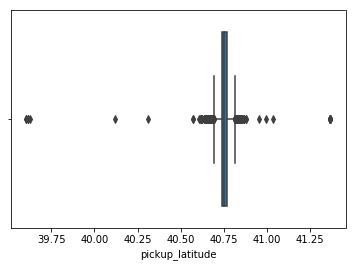

In [808]:
sns.boxplot(car_data['pickup_latitude'])

In [809]:
car_data['pickup_longitude'].sort_values(ascending = True)

649     -74.438233
12940   -74.229138
10524   -74.181602
9090    -74.133710
12173   -74.129877
1494    -74.105395
7635    -74.102257
11964   -74.089848
2346    -74.086412
12934   -74.076830
13836   -74.072833
13736   -74.064055
13756   -74.063010
7096    -74.042958
14136   -74.041883
9775    -74.039047
105     -74.035839
4291    -74.031268
10485   -74.023050
13600   -74.018108
14938   -74.017776
4410    -74.017288
8423    -74.017255
14448   -74.017236
1916    -74.017199
2122    -74.017173
14191   -74.017148
11620   -74.017095
2735    -74.017087
4828    -74.017067
           ...    
5795    -73.776708
5474    -73.776707
8163    -73.776703
11280   -73.776702
4118    -73.776700
14099   -73.776687
9854    -73.776685
13603   -73.776652
6978    -73.776644
4347    -73.776620
7699    -73.776600
737     -73.776477
15366   -73.776343
4086    -73.776293
7908    -73.725993
13175   -73.688170
12915   -73.652179
11187   -73.649355
6308    -73.422692
13571   -73.416169
5648    -73.137393
4487    -73.

In [810]:
car_data=car_data.drop(car_data[car_data.loc[:,'pickup_longitude']>-72].index)
car_data=car_data.drop(car_data[car_data.loc[:,'pickup_longitude']<-76].index)

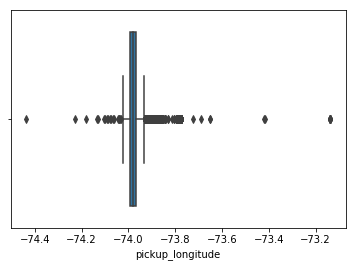

In [811]:
sns.boxplot(car_data['pickup_longitude'])

In [812]:
car_data.shape

(15577, 7)

# Dropoff longitude and latitude

In [813]:
car_data.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'fare_amount'],
      dtype='object', name='Variables')

In [814]:
car_data['dropoff_longitude'].sort_values(ascending = True)

12940   -74.227047
649     -74.185996
4620    -74.183955
9431    -74.183504
12614   -74.183312
2013    -74.183247
4013    -74.183238
7716    -74.182495
10524   -74.181602
8363    -74.178093
7152    -74.177992
9651    -74.177897
14519   -74.177755
6211    -74.177489
6972    -74.177459
5297    -74.177341
10231   -74.177318
11743   -74.177202
4011    -74.177160
13962   -74.177115
1709    -74.177083
6668    -74.177034
4064    -74.177023
12437   -74.176987
2639    -74.176925
4353    -74.162477
10000   -74.138033
12173   -74.136677
9090    -74.135442
7635    -74.113213
           ...    
14569   -73.735343
7908    -73.726348
1127    -73.719100
13615   -73.717443
13175   -73.699185
11187   -73.656815
7810    -73.652193
12915   -73.652179
10077   -73.602318
15023   -73.587587
13571   -73.416169
14367   -73.137393
6416    -73.137393
10688   -73.137393
7401    -73.137393
7043    -73.137393
5648    -73.137393
9899    -73.137393
5864     -7.986640
10458     0.000000
4278      0.000000
2280      0.

In [815]:
car_data= car_data.drop(car_data[car_data.loc[:,'dropoff_longitude']>-72].index)
car_data= car_data.drop(car_data[car_data.loc[:,'dropoff_longitude']<-76].index)

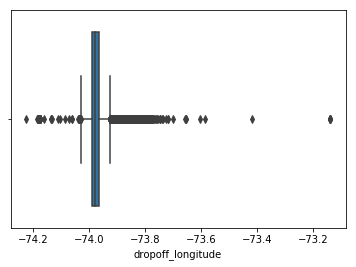

In [816]:
sns.boxplot(car_data['dropoff_longitude'])

In [817]:
car_data['dropoff_latitude'].sort_values(ascending = True)

7014      0.728087
8584     39.604972
8334     39.605025
14536    39.610030
12228    39.610604
8176     39.625547
14421    40.164927
12173    40.316153
4567     40.484335
13736    40.543870
10000    40.550097
4291     40.551710
12398    40.574652
8552     40.574729
2283     40.577815
12940    40.581207
7635     40.582228
11488    40.584596
13506    40.588240
10898    40.588485
5044     40.590033
5795     40.590188
6971     40.590317
6384     40.597675
7368     40.598020
11964    40.602097
11859    40.604206
8347     40.604415
9533     40.605535
4353     40.606746
           ...    
5196     40.871050
6818     40.871675
2454     40.871892
7199     40.873300
8090     40.873954
4789     40.877547
9747     40.884017
4692     40.884172
7452     40.884410
3290     40.885300
4654     40.885355
9729     40.885884
9991     40.887539
2834     40.893033
1623     40.896535
8105     40.898910
11231    40.899325
15207    40.904590
7021     40.905170
7769     40.911461
4118     40.921800
3394     40.

In [818]:
car_data= car_data.drop(car_data[car_data.loc[:,'dropoff_latitude']<39].index)
car_data= car_data.drop(car_data[car_data.loc[:,'dropoff_latitude']>43].index)

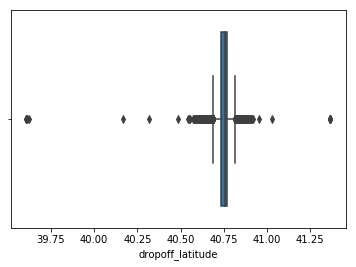

In [819]:
sns.boxplot(car_data['dropoff_latitude'])

In [820]:
#sns.pairplot(car_data,vars = ['pickup_longitude', 'pickup_latitude',
       #'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       #'fare_amount'],diag_kind = "kde",kind= "reg")

In [821]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15564 entries, 0 to 16065
Data columns (total 7 columns):
pickup_datetime      15564 non-null object
pickup_longitude     15564 non-null float64
pickup_latitude      15564 non-null float64
dropoff_longitude    15564 non-null float64
dropoff_latitude     15564 non-null float64
passenger_count      15564 non-null float64
fare_amount          15564 non-null float64
dtypes: float64(6), object(1)
memory usage: 972.8+ KB


In [822]:
#car_data['pickup_datetime'] =  pd.to_datetime(car_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [823]:
car_data = car_data.drop(car_data[car_data.loc[:,'pickup_datetime']=='43'].index)

In [824]:
car_data['pickup_datetime'] =  pd.to_datetime(car_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [825]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15563 entries, 0 to 16065
Data columns (total 7 columns):
pickup_datetime      15563 non-null datetime64[ns]
pickup_longitude     15563 non-null float64
pickup_latitude      15563 non-null float64
dropoff_longitude    15563 non-null float64
dropoff_latitude     15563 non-null float64
passenger_count      15563 non-null float64
fare_amount          15563 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 972.7 KB


In [826]:
car_data['year'] = car_data['pickup_datetime'].dt.year
car_data['Month'] = car_data['pickup_datetime'].dt.month
car_data['Date'] = car_data['pickup_datetime'].dt.day
car_data['Day'] = car_data['pickup_datetime'].dt.dayofweek
car_data['Hour'] = car_data['pickup_datetime'].dt.hour
car_data['Minute'] = car_data['pickup_datetime'].dt.minute

In [827]:
car_data.head()

Variables,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,Month,Date,Day,Hour,Minute
0,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5,2009,6,15,0,17,26
1,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9,2010,1,5,1,16,52
2,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7,2011,8,18,3,0,35
3,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7,2012,4,21,5,4,30
4,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3,2010,3,9,1,7,51


In [828]:
def harvesine_distance(lat1, long1, lat2, long2):
    data = [car_data]
    for i in data: 
        R = 6371 #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
        
        delta_phi = np.radians(i[lat2] - i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
        
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi/2.0)**2 + np.cos(phi1) * np.cos(phi2)* np.sin(delta_lambda/2.0)**2
        
        #c = 2 * arctan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        
        #d = R * c
        d = (R * c) #distance in kilometers
        i['H_Distance'] = d
    return d

In [829]:
harvesine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0         1.030764
1         8.450134
2         1.389525
3         2.799270
4         1.999157
5         3.787239
6         1.555807
7         4.155444
9         2.849627
10        1.374577
12        0.717767
13        2.019384
14        1.671445
16        2.609774
17        1.511904
18        0.921952
19        0.399179
20        1.686861
21        2.292470
22        0.924296
23        1.403958
24        1.017773
25        2.531947
27        0.328771
28        4.073463
29        0.808153
30        0.871913
32        9.403296
33        1.381589
34        7.150503
           ...    
16035     2.236055
16036     3.758805
16037     1.711032
16038     2.941770
16039     1.981039
16040     1.456346
16041     3.253381
16042     2.546337
16043     1.755990
16044     3.105214
16045     1.442334
16046     1.756779
16047     0.780375
16048     3.713784
16049     4.806617
16050     1.886438
16051     3.756046
16052     1.432945
16053     0.881922
16054     1.431465
16055    14.022308
16057     1.

In [830]:
car_data.head()

Variables,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,Month,Date,Day,Hour,Minute,H_Distance
0,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,4.5,2009,6,15,0,17,26,1.030764
1,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,16.9,2010,1,5,1,16,52,8.450134
2,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,5.7,2011,8,18,3,0,35,1.389525
3,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,7.7,2012,4,21,5,4,30,2.799270
4,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,5.3,2010,3,9,1,7,51,1.999157


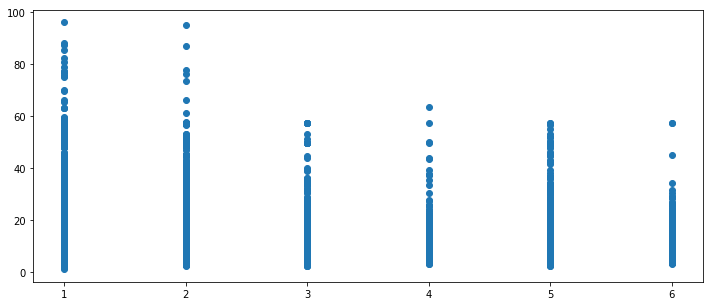

In [845]:
plt.figure(figsize=(12,5))
ax=plt.scatter(x = car_data['passenger_count'], y = "fare_amount", data = car_data)

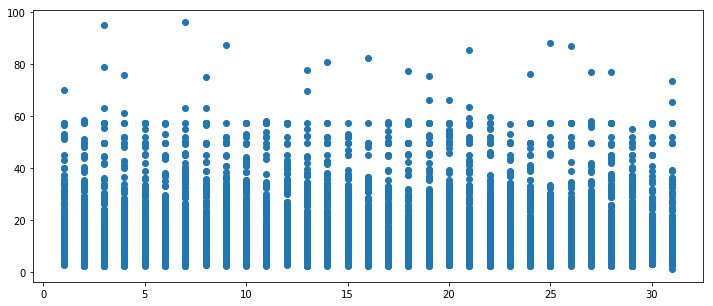

In [843]:
plt.figure(figsize=(12,5))
ad=plt.scatter(x ="Date" , y =car_data['fare_amount'] , data = car_data)

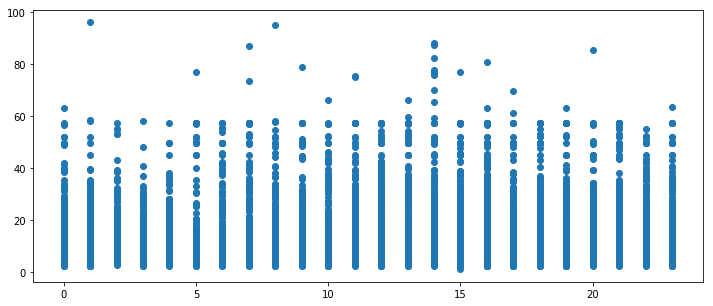

In [844]:
plt.figure(figsize=(12,5))
ah=plt.scatter(x ="Hour" , y =car_data['fare_amount'] , data = car_data)

Text(0,0.5,'fare_amount')

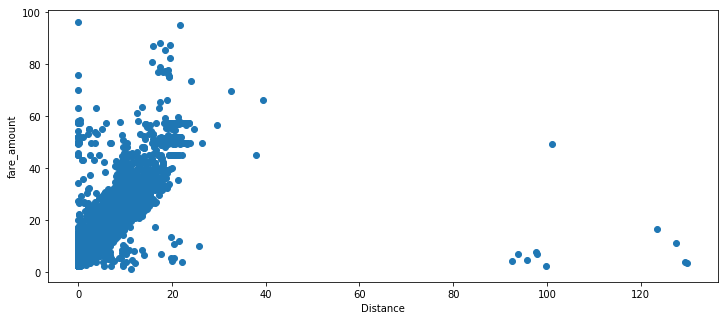

In [848]:
plt.figure(figsize=(12,5))
ah=plt.scatter(x ="H_Distance" , y =car_data['fare_amount'] , data = car_data)
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [856]:
car_data= car_data.drop(car_data[car_data.loc[:,'H_Distance']>50].index)
car_data= car_data.drop(car_data[car_data.loc[:,'H_Distance']==0].index)

Text(0,0.5,'fare_amount')

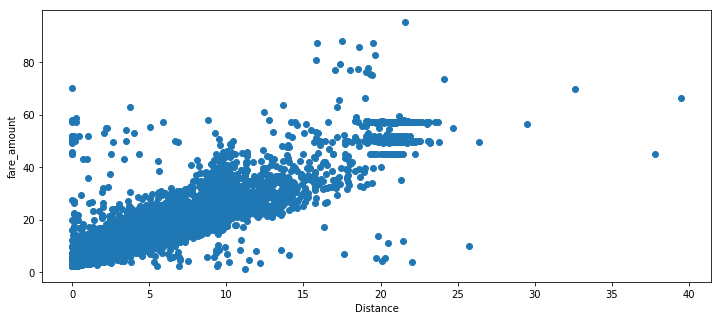

In [857]:
plt.figure(figsize=(12,5))
ah=plt.scatter(x ="H_Distance" , y =car_data['fare_amount'] , data = car_data)
plt.xlabel("Distance")
plt.ylabel("fare_amount")

In [858]:
car_data.shape

(15398, 14)

In [859]:
car_data.columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'fare_amount', 'year', 'Month', 'Date', 'Day', 'Hour', 'Minute',
       'H_Distance'],
      dtype='object', name='Variables')

In [861]:
features = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
        'year', 'Month', 'Date', 'Day', 'Hour', 'Minute',
       'H_Distance']

In [862]:
X = car_data[features]
y = car_data.fare_amount

In [863]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [864]:
from sklearn import linear_model as lm

In [867]:
model_lm = lm.LinearRegression()
model_lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [869]:
pred_lm = model_lm.predict(X_test)

In [879]:
def MAPE(y_test,y_predict):
    mape = np.mean(np.abs(y_test-y_predict)/y_test)*100
    print("Mean absolute percentage error is: ",round(mape,2),"%")
    return mape

In [880]:
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse

In [881]:
MAPE(y_test,pred_lm)
RMSE(y_test,pred_lm)

Mean absolute percentage error is:  20.45 %
Mean Square :  18.762721809126674
Root Mean Square :  4.331595757815666


4.331595757815666